# Crime data from 2016

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2016'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data','crime/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date            122693 non-null datetime64[ns]
Hour            122693 non-null int64
Offense Type    122693 non-null object
Beat            122693 non-null object
Premise         121293 non-null object
BlockRange      122693 non-null object
StreetName      122693 non-null object
Type            122693 non-null object
Suffix          122693 non-null object
# offenses      122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


In [7]:
df.head(2)

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

Date               0
Hour               0
Offense Type       0
Beat               0
Premise         1400
BlockRange         0
StreetName         0
Type               0
Suffix             0
# offenses         0
dtype: int64

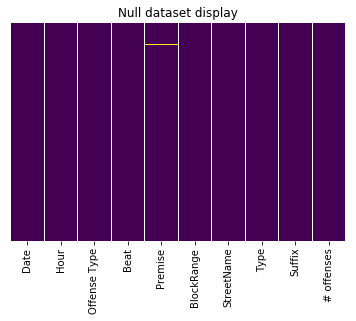

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,date,hour,offense type,beat,premise,blockrange,streetname,type,suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [12]:
df.rename(columns={
    '# offenses': 'num_offenses',
     'offense type': 'offense_type',
    'blockrange': 'block_range',
    'streetname': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
date            122693 non-null datetime64[ns]
hour            122693 non-null int64
offense_type    122693 non-null object
beat            122693 non-null object
premise         121293 non-null object
block_range     122693 non-null object
street_name     122693 non-null object
type            122693 non-null object
suffix          122693 non-null object
num_offenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


In [13]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,suffix,num_offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


## Drop columns

In [14]:
df.drop(['suffix'],axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 9 columns):
date            122693 non-null datetime64[ns]
hour            122693 non-null int64
offense_type    122693 non-null object
beat            122693 non-null object
premise         121293 non-null object
block_range     122693 non-null object
street_name     122693 non-null object
type            122693 non-null object
num_offenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 8.4+ MB


In [16]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,num_offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,1


# Null values

In [17]:
df.apply(lambda x: sum(x.isnull()))

date               0
hour               0
offense_type       0
beat               0
premise         1400
block_range        0
street_name        0
type               0
num_offenses       0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,premise,block_range,street_name,type,num_offenses
121865,2016-09-13,13,Theft,7C30,NaN,7600-7699,CURRY,RD,1
121876,2015-10-13,11,Rape,7C30,NaN,9100-9199,JENSEN,DR,1
121894,2014-08-31,15,Rape,7C40,NaN,2400-2499,DEUTSER,ST,1
121906,2016-09-29,1,Aggravated Assault,7C50,NaN,15300-15399,VANTAGE,PKWY,1
121909,2016-09-28,7,Theft,7C50,NaN,15600-15699,JOHN F KENNEDY,BLVD,1
121999,2016-09-13,0,Theft,7C50,NaN,15700-15799,JOHN F KENNEDY,BLVD,2
122013,2016-09-14,0,Theft,7C50,NaN,15200-15299,JOHN F KENNEDY,BLVD,1
122184,2016-09-15,23,Theft,8C30,NaN,9100-9199,WAYSIDE,-,1
122218,2016-09-01,7,Theft,8C40,NaN,9000-9099,SPIKEWOOD,DR,1
122472,2016-09-05,10,Theft,9C30,NaN,9700-9799,WALLISVILLE,RD,1


### Drop rows with more than 3 null values

In [19]:
df.dropna(thresh=3,inplace=True)

In [20]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,offense_type,beat,premise,block_range,street_name,type,num_offenses
121865,2016-09-13,13,Theft,7C30,NaN,7600-7699,CURRY,RD,1
121876,2015-10-13,11,Rape,7C30,NaN,9100-9199,JENSEN,DR,1
121894,2014-08-31,15,Rape,7C40,NaN,2400-2499,DEUTSER,ST,1
121906,2016-09-29,1,Aggravated Assault,7C50,NaN,15300-15399,VANTAGE,PKWY,1
121909,2016-09-28,7,Theft,7C50,NaN,15600-15699,JOHN F KENNEDY,BLVD,1
121999,2016-09-13,0,Theft,7C50,NaN,15700-15799,JOHN F KENNEDY,BLVD,2
122013,2016-09-14,0,Theft,7C50,NaN,15200-15299,JOHN F KENNEDY,BLVD,1
122184,2016-09-15,23,Theft,8C30,NaN,9100-9199,WAYSIDE,-,1
122218,2016-09-01,7,Theft,8C40,NaN,9000-9099,SPIKEWOOD,DR,1
122472,2016-09-05,10,Theft,9C30,NaN,9700-9799,WALLISVILLE,RD,1


### Replace null values on premise_code to 'none'

In [21]:
df.premise.fillna('UNK',inplace=True)

In [22]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     0
type            0
num_offenses    0
dtype: int64

# Inspect each column

## `num_offenses`

In [23]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,num_offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,1


In [24]:
df.num_offenses.value_counts(dropna=False)

1     120640
2       1741
3        212
4         63
5         21
6         11
13         2
10         1
8          1
7          1
Name: num_offenses, dtype: int64

In [25]:
df.num_offenses.dtype

dtype('int64')

### Change the type from float to integer

In [26]:
df.num_offenses = df.num_offenses.astype('int')

In [27]:
df.num_offenses.dtype

dtype('int64')

In [28]:
df.num_offenses.value_counts(dropna=False)

1     120640
2       1741
3        212
4         63
5         21
6         11
13         2
10         1
8          1
7          1
Name: num_offenses, dtype: int64

## `beat`

In [29]:
len(df.beat.value_counts(dropna='False'))

120

In [30]:
df.beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [31]:
df.beat = df.beat.str.strip()

In [32]:
len(df.beat.unique())

120

## `block_range`

In [33]:
len(df.block_range.unique())

242

In [34]:
df.block_range = df.block_range.str.strip()

In [35]:
len(df.block_range.unique())

242

## `date`

In [36]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [37]:
df.hour.value_counts(dropna=False)

15    7654
16    7508
14    7320
13    7154
11    7093
10    7075
9     7036
12    7026
17    6661
8     6347
18    5994
19    5509
20    5324
7     5178
21    4791
22    4458
23    3879
6     3322
0     2973
1     2400
2     2355
5     1965
3     1925
4     1746
Name: hour, dtype: int64

In [38]:
df.hour.dtype

dtype('int64')

## Change dtype 

In [39]:
df.hour = df.hour.astype('int')

In [40]:
df.hour.dtype

dtype('int64')

In [41]:
df.hour.value_counts(dropna=False)

15    7654
16    7508
14    7320
13    7154
11    7093
10    7075
9     7036
12    7026
17    6661
8     6347
18    5994
19    5509
20    5324
7     5178
21    4791
22    4458
23    3879
6     3322
0     2973
1     2400
2     2355
5     1965
3     1925
4     1746
Name: hour, dtype: int64

## `offense_type`

In [42]:
df.offense_type.value_counts(dropna=False)

Theft                 69219
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
1                         4
Name: offense_type, dtype: int64

In [43]:
df.offense_type.unique()

array(['Robbery', 'Aggravated Assault', 'Auto Theft', 'Burglary', 'Theft',
       'Murder', 'Rape', 1], dtype=object)

## `street_name`

In [44]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     0
type            0
num_offenses    0
dtype: int64

In [45]:
len(df.street_name.value_counts(dropna=False))

7844

In [46]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER     3768
SAM HOUSTON    1792
GULF           1785
KATY           1696
GESSNER        1680
RICHMOND       1667
NORTH          1663
LOOP           1471
SOUTHWEST      1260
MAIN           1207
Name: street_name, dtype: int64

In [47]:
df.street_name.unique()

array(['MILBY', 'YORK', 'RUNNELS', ..., 'BRYSTONE', 'RICHCREST',
       'GLEN BAY'], dtype=object)

In [48]:
df.street_name = df.street_name.str.strip()

In [49]:
df.apply(lambda x: sum(x.isnull()))

date             0
hour             0
offense_type     0
beat             0
premise          0
block_range      0
street_name     38
type             0
num_offenses     0
dtype: int64

In [50]:
len(df.street_name.value_counts(dropna=False))

7844

In [51]:
df.street_name = df.street_name.str.upper()

In [52]:
len(df.street_name.value_counts(dropna=False))

7844

## Organiaze columns

In [53]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,num_offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,1


In [54]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses','type']

In [55]:
df = df.reindex(columns=cols)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122693 entries, 0 to 122692
Data columns (total 9 columns):
date            122693 non-null datetime64[ns]
hour            122693 non-null int64
beat            122693 non-null object
offense_type    122693 non-null object
block_range     122693 non-null object
street_name     122655 non-null object
premise         122693 non-null object
num_offenses    122693 non-null int64
type            122693 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 9.4+ MB


In [57]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,type
0,2016-04-10,20,10H10,Robbery,4000-4099,MILBY,"Road, Street, or Sidewalk",1,-
1,2016-04-11,19,10H10,Aggravated Assault,400-499,YORK,"Road, Street, or Sidewalk",2,-
2,2016-04-12,20,10H10,Robbery,1900-1999,RUNNELS,Apartment,1,-
3,2016-04-13,2,10H10,Auto Theft,100-199,SIDNEY,Driveway,1,-
4,2016-04-14,3,10H10,Burglary,3300-3399,CANAL,Service or Gas Station,1,ST


## Display Null values

In [58]:
df.apply(lambda x: sum(x.isnull()))

date             0
hour             0
beat             0
offense_type     0
block_range      0
street_name     38
premise          0
num_offenses     0
type             0
dtype: int64

In [59]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses,type
89035,2016-05-20,16,3B40,Auto Theft,UNK,NaN,Residence or House,1,ST
89054,2016-05-28,22,3B40,Aggravated Assault,UNK,NaN,Residence or House,1,ST
89096,2016-05-17,23,3B40,Aggravated Assault,UNK,NaN,"Road, Street, or Sidewalk",1,ST
89140,2016-05-26,12,3B50,Theft,UNK,NaN,Residence or House,1,-
98499,2016-11-19,2,2A30,Aggravated Assault,UNK,NaN,"Road, Street, or Sidewalk",1,ST
98520,2016-11-12,11,2A30,Auto Theft,UNK,NaN,Other Parking Lot,1,ST
98600,2016-11-21,21,2A30,Robbery,UNK,NaN,"Road, Street, or Sidewalk",1,ST
108740,2016-10-27,5,2A30,Theft,UNK,NaN,Driveway,1,ST
119300,2016-09-06,16,2A30,Theft,UNK,NaN,Restaurant or Cafeteria Parking Lot,1,ST
119323,2016-04-05,15,2A30,Theft,UNK,NaN,Residence or House,1,ST


## Drop null street name

In [60]:
df.dropna(subset=['street_name'],inplace=True)

In [61]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    0
block_range     0
street_name     0
premise         0
num_offenses    0
type            0
dtype: int64

## Save clean data

In [62]:
data_directory_saves

'../data/clean_data/crime/'

In [63]:
df.to_csv(data_directory_saves+'crime_2016.csv')

offense_type as wrong value that neets to  be changed